In [34]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import loggamma as lng
from scipy.optimize import minimize

In [35]:
z = np.array([0,6,12,18])*1e-4
n = np.array([1880,940,530,305])

r= .52e-4 #cm
g = 980 #cm/s^2
d_rho=.063 #g/cm^3
T = 293 #Kelvin

#E/z
E = (4*np.pi*(r**3)*(d_rho)*g/3)

#initial guesses
v0 = 500
kb = 1e-10
p0 = [v0,kb]

#negative sum of lnL
def sumlnL(params):
    v0,kb = params
    totallnL = []
    for i in range(len(n)):
        loglike= n[i]*np.log(v0) -n[i]*(E*z[i]/(kb*T)) -v0*np.exp( -E*z[i]/(kb*T) ) -lng(n[i]+1)
        totallnL.append(-loglike)
    total = np.sum(totallnL)
    return total

res = minimize(sumlnL,p0,method = "Nelder-Mead")
vbest, kbest = res.x[0], res.x[1]
print('ML estimate of: v0= ',vbest,' kb= ',kbest)

ML estimate of: v0=  1844.9444867046618  kb=  1.1987024899199276e-16


In [36]:
#STRAIGHT FROM GITHUB EXAMPLE
v,k = np.meshgrid(np.linspace(.5*vbest,1.5*vbest,500),np.linspace(.5*kbest,1.5*kbest,500))
cont = np.zeros_like(v)

for i in range(cont.shape[0]):
    for j in range(cont.shape[1]):
        param= v[i][j],k[i][j]
        cont[i][j] = sumlnL(param)


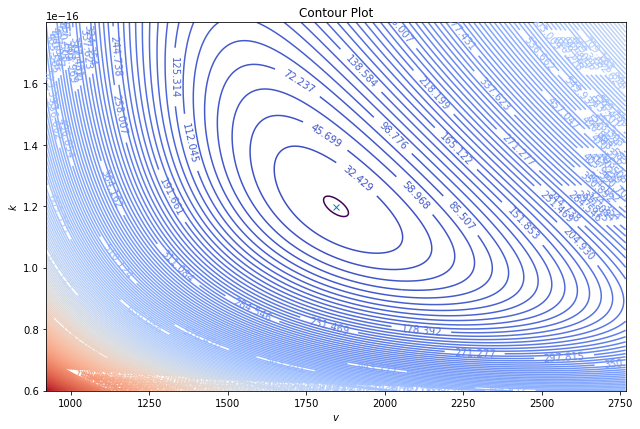

In [37]:
sigma = sumlnL([vbest,kbest])
fig, ax = plt.subplots(1,1, figsize=(9,6))

#Uncomment these to see contour plot zoomed in around best value

#ax.set_xlim(1500,2350)
#ax.set_ylim(.9e-16,1.5e-16)
#ytx = np.linspace(.9e-16,1.5e-16,10)
#ax.set_yticks(ytx)

cs = ax.contour(v, k, cont, levels=np.linspace(np.min(cont),np.max(cont),150), cmap='coolwarm')
sig = ax.contour(v,k,cont,levels=[sigma+.5])
ax.clabel(cs, inline=True, fontsize=10)
ax.set(xlabel=r'$v$', ylabel=r'$k$')
fig.tight_layout()
plt.plot(vbest,kbest,'x')
plt.title('Contour Plot')
plt.show()